In the Data Structures files, we learned about different data structures, such as lists and dictionaries. We have been describing how to efficiently search and update these structures, but there has always been a trade-off between the two. 

Now we will develop a data structure that has both fast search and efficient updates. Unfortunately, we are at a crossroads now, where developing this new data structure requires a new way of thinking. This type of thinking is called **recursion**.

Recall that recursion commonly refers to a function that calls itself. This backward way of thinking takes some time to sink in, but we'll soon notice that many algorithms and structures we come up with are naturally defined this way. Recursion doesn't just happen in programming though — there are examples of it even in art!

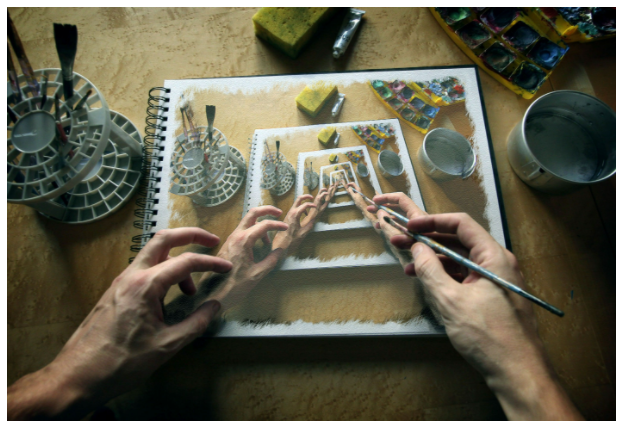

We may have also encountered recursion in real life. Think about a time when we rode an elevator with mirrors on both sides. The mirrors reflect each other, and it looks like they keep going on forever.

In practice, we don't want our algorithms to keep going on forever. To stop recursion from continuing to infinity, we need to have some base case that makes sure it eventually stops. When we use recursion, we express the problem we want to solve as simpler instances of the same problem. The recursion comes from the fact that we use the same algorithm to solve those simpler instances. The base case happens when the problem becomes simple enough that we don't need to break it down further to solve it.

Once we learn this shift in thinking, it can be incredibly valuable when trying to come up with unique solutions to problems. By the end, we will learn how to implement our own recursive algorithms.

The best way to understand recursion is to actually work with it. The shift from iterative to recursive thinking takes some time — it's easiest to learn with examples. We're going to sum up a list of integers using iteration and then using recursion.

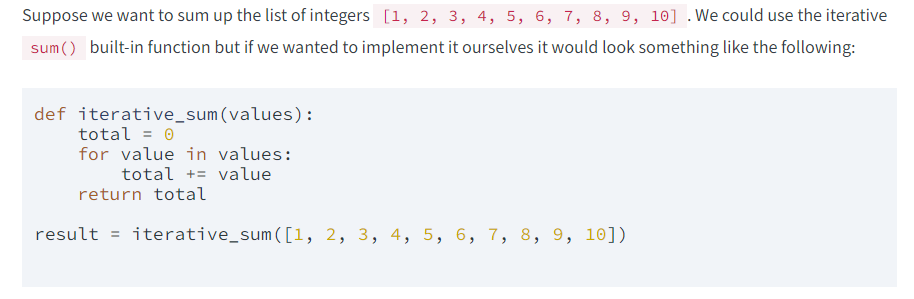

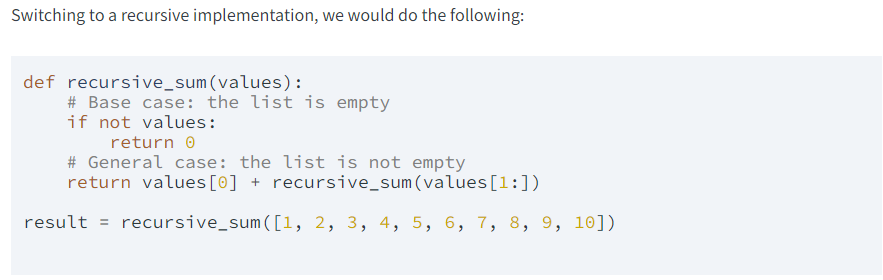

As we can see in the second `return` statement, this algorithm calls itself. Such an algorithm is called a **recursive** algorithm.

Let's break down this recursive implementation. We call the code inside the `if` statement the "base case" because it terminates the recursion — it won't call the function again. This ensures that the function eventually stops.

The base case corresponds to a case where the result of the calculation we are doing becomes trivial. In this case, it happens when the list is empty. The sum of all values in an empty list is `0` since there are no values to add.

If the list isn't empty, we express the sum by saying that the result of adding all elements in the list is equal to the first value plus the sum of the remaining values (note that we drop the first value of the list when we make the recursive call). This is what we mean by expressing the problem as a simpler instance of the same problem. In this case, the simpler instance of the problem is the problem of adding together all values in a list with one less element.

The following animation illustrates how the algorithm calculates the sum of a list with a single element:

In [1]:
from IPython.display import Image

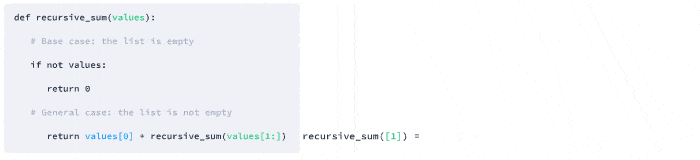

In [2]:
Image("2.1-m228.gif")

In the example above, the list becomes empty after the first step, and we reach the base case immediately. In general, at each recursive call, the list reduces by one until it becomes empty — the base case. Here an example of a list with three elements `[1, 2, 3]`:

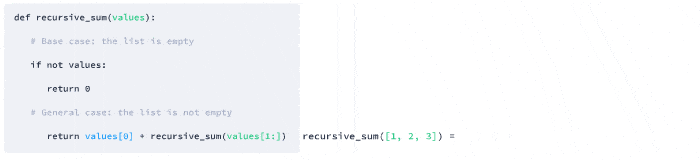

In [3]:
Image("2.2-m228.gif")

**Task**

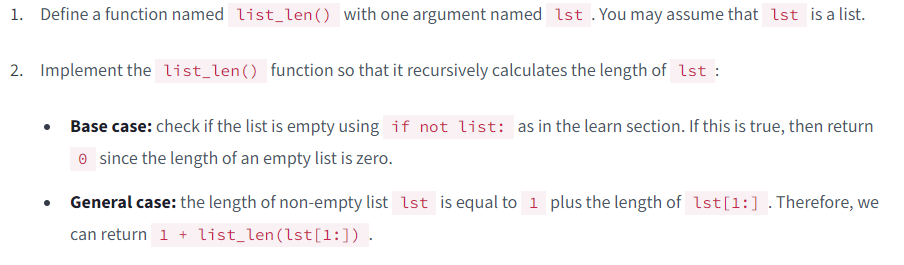

**Answer**

In [4]:
fruits = ["apple", "orange", "pear", "fig", "passionfruit"]

def list_len(lst):
    if not lst:
        return 0
    return 1 + list_len(lst[1:])

num_fruits = list_len(fruits)

We've mentioned that we always need a base case to ensure our recursive algorithms don't continue forever. Even though we know we don't want to run our function forever, why do we keep bringing this case up, and why is it such a big deal?

If we were to let recursion run forever our program eventually runs out of memory! This is why we need the base case. The concept of running out of memory with a simple recursion function seems ridiculous, but it does happen due to recursion's inner workings.

When the Python interpreter starts up, it manages the calling and returning of functions using an in-memory **call stack**. This call stack implementation is exactly the same as the stack data structure we learned before. We use the `pop()` and `push()` methods to manage the return values and function calls.

Here's an animation describing this process for the `list_len(`) method that we implemented above:

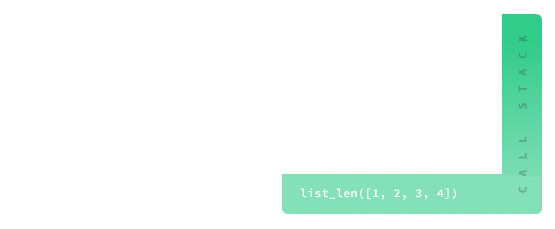

In [5]:
Image("3.1-m228.gif")

Without a base case, the recursion goes on forever, and the stack grows indefinitely until we run out of memory. Here's an example of such a function:

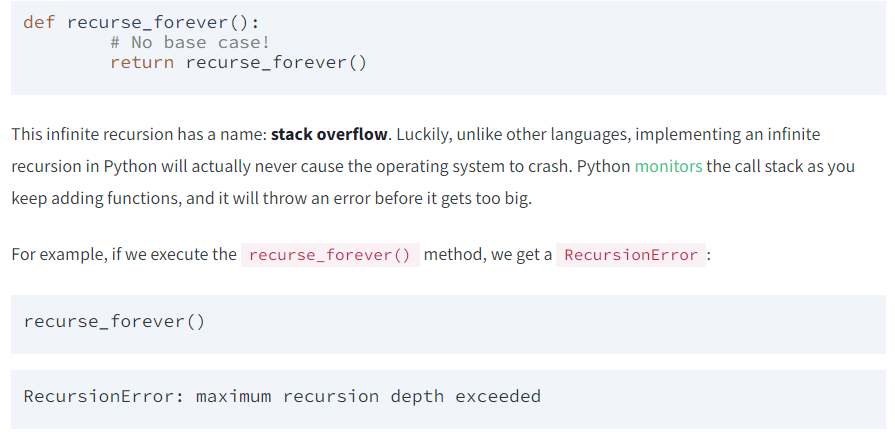

Only showed the last line of the error for readability.

**Task**

Let's verify that we get an error when we remove the base case of a recursive function.

**Answer**

In [6]:
def list_len(lst):
    return 1 + list_len(lst[1:])

list_len(fruits)

RecursionError: maximum recursion depth exceeded

It might look like recursion is just yet another way of looping over the data. However, in reality, it's much more powerful than that.

Now we'll solve the [Tower of Hanoi puzzle](https://en.wikipedia.org/wiki/Tower_of_Hanoi). The puzzle consists of three pegs and a stack of disks of different sizes. Initially, all disks are stacked, from largest to smallest, on the first peg. The goal is to move them to the third peg in the same order. There are two rules:

1. We can only move one disk at a time.
2. We cannot put a larger disk on top of a smaller disk.

The following animation illustrates a sequence of moves to solve the puzzle when the number of disks is equal to three:

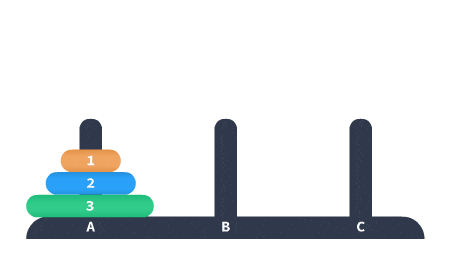

In [7]:
Image("4.1-m228.gif")

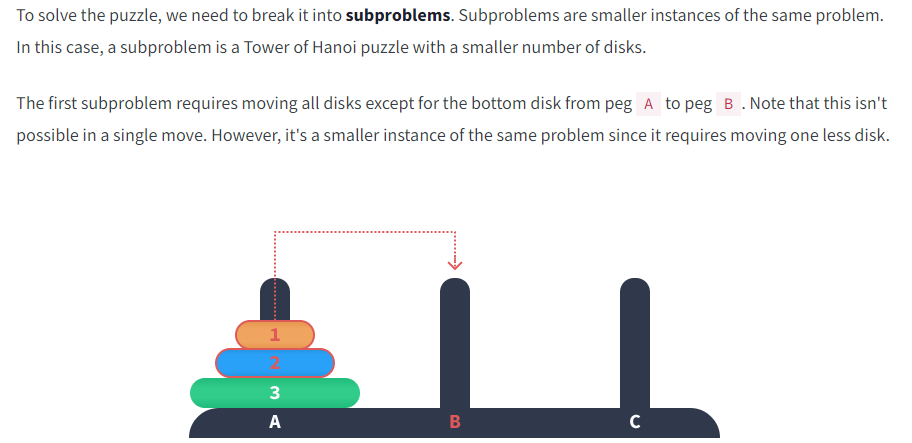

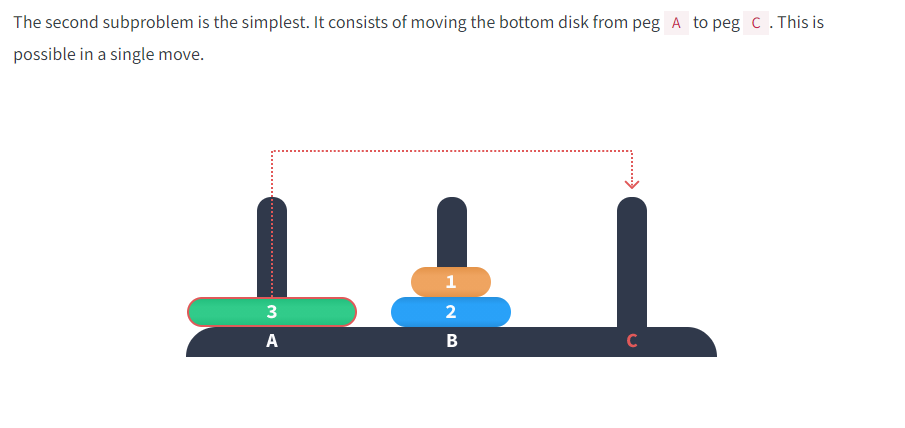

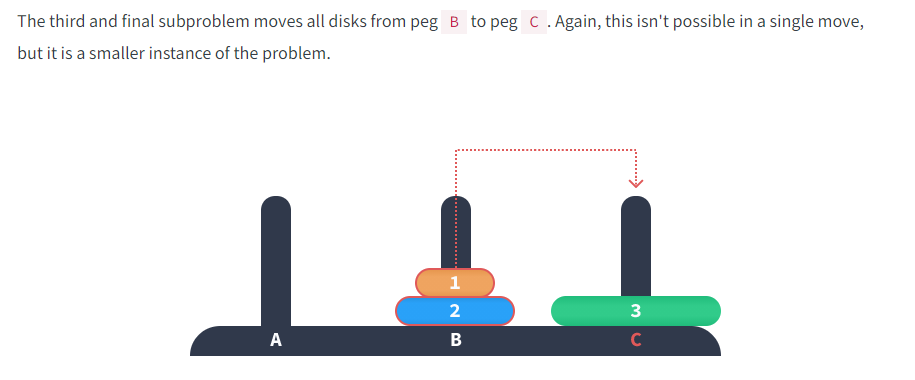

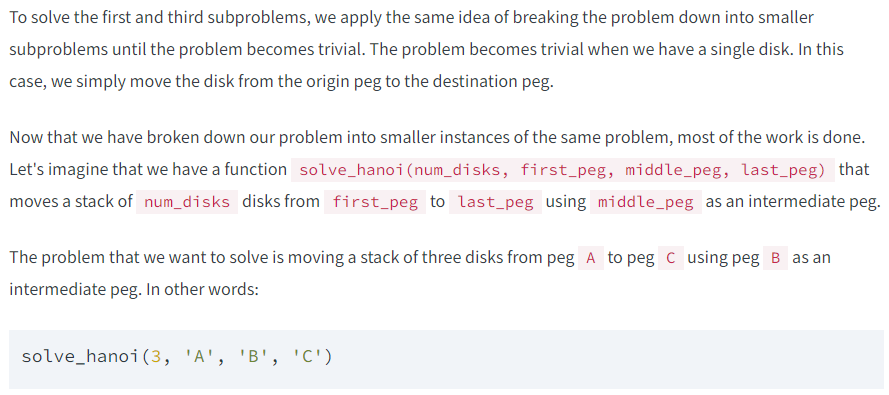

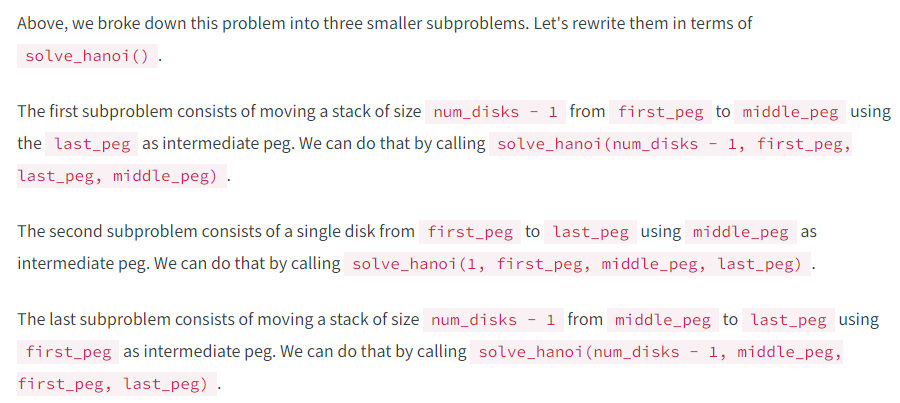

**Task**

We've provided with a partial implementation of the `solve_hanoi()` function. It already contains the base case and the second subproblem of the general case. Our goal is to implement the recursive calls that solve the first and third subproblems.

**Answer**

In [8]:
def solve_hanoi(num_disks, first_peg, middle_peg, last_peg):
    if num_disks == 1:
        # Base case
        print("Move the top disk from peg {} to peg {}.".format(first_peg, 
                                                                last_peg))
    else:
        # General Case
        solve_hanoi(num_disks - 1, first_peg, last_peg, middle_peg)
        solve_hanoi(1, first_peg, middle_peg, last_peg)
        solve_hanoi(num_disks - 1, middle_peg, first_peg, last_peg)

solve_hanoi(3, 'A', 'B', 'C')

Move the top disk from peg A to peg C.
Move the top disk from peg A to peg B.
Move the top disk from peg C to peg B.
Move the top disk from peg A to peg C.
Move the top disk from peg B to peg A.
Move the top disk from peg B to peg C.
Move the top disk from peg A to peg C.


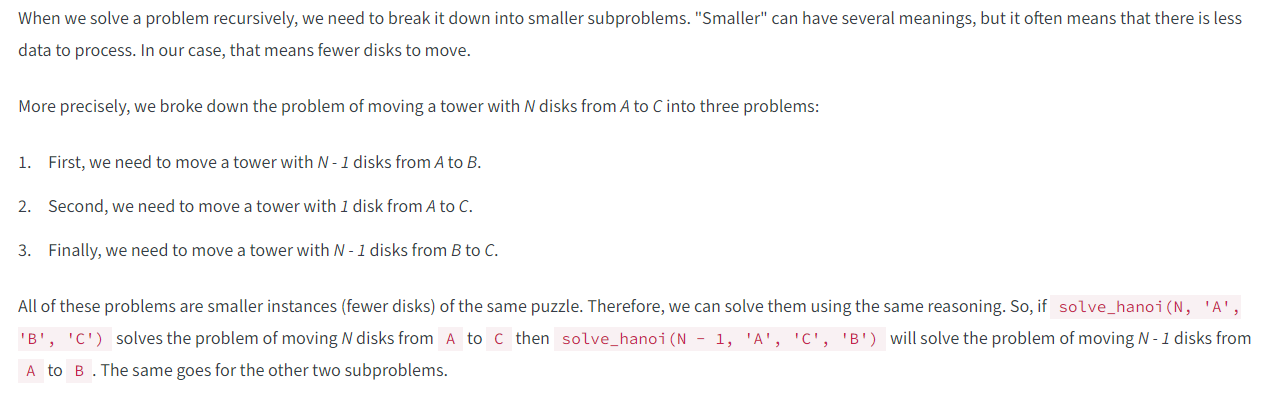

Since the number of disks in each subproblem is smaller, all subproblems eventually contain a single disk. These subproblems with a single disk are solveable with a single move. The combination of all of these moves results in a solution to the original puzzle.

Now we'll continue practicing recursion by solving a very practical problem. The goal is to list all files that are contained in a given folder (directly or indirectly).

Let's see an example:

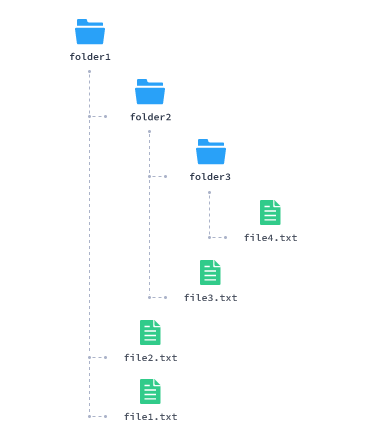

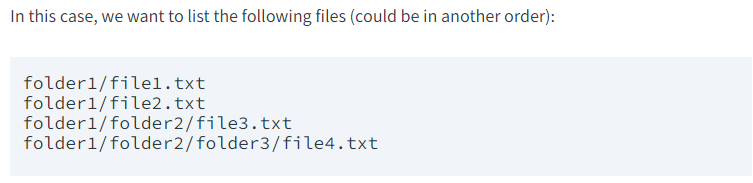

As we can see, a folder can contain files and other folders. The same holds for these other folders and the folders inside them, and so on.

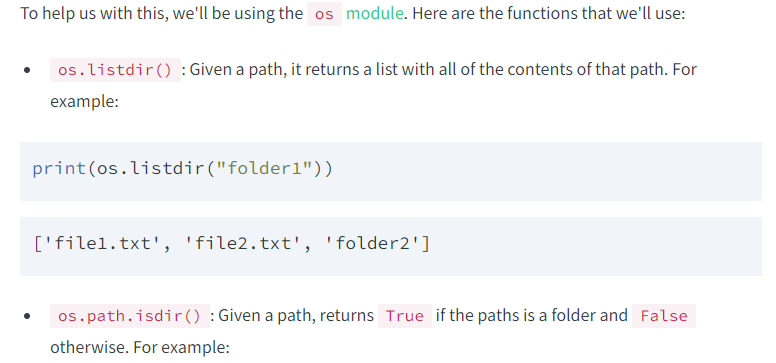

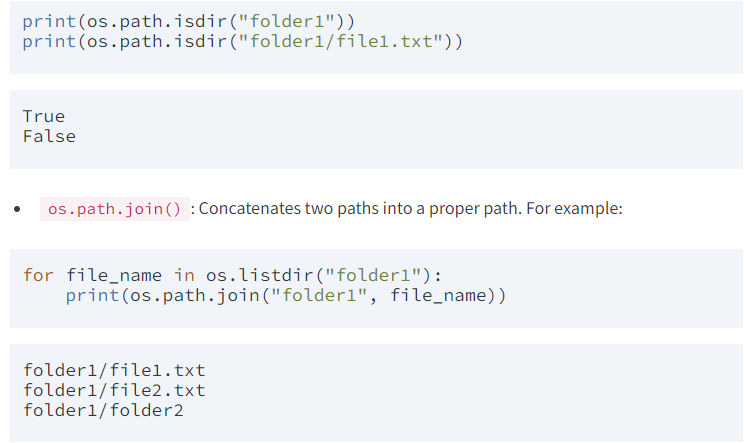

Let's use these three functions to implement a function that recursively lists all files starting from a given directory.

**Task**

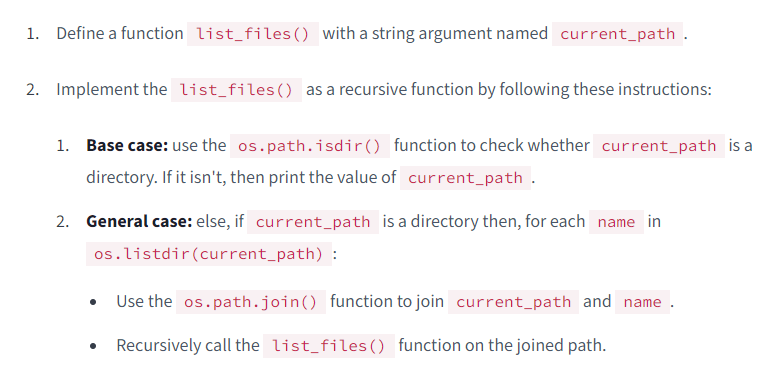

**Answer**

In [10]:
import os

def list_files(current_path):
    #Base case
    if not os.path.isdir(current_path):
        print(current_path)
    else:
        # General case
        for name in os.listdir(current_path):
            file_path = os.path.join(current_path, name)
            list_files(file_path)
            
list_files(".ipynb_checkpoints")

.ipynb_checkpoints\1.Overview of Recursion-checkpoint.ipynb


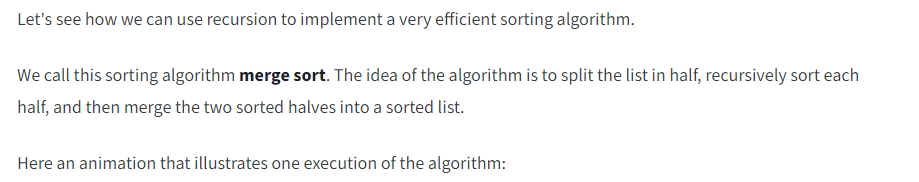

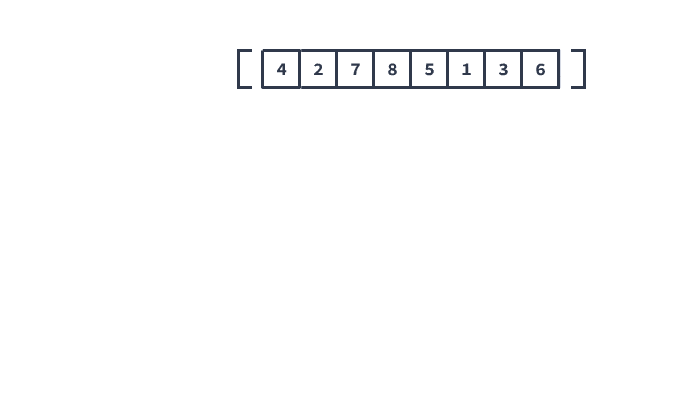

In [11]:
Image("7.1-m228.gif")

Now we'll focus on implementing the merge part of the algorithm. More specifically, we want to devise an algorithm that, given two sorted lists, creates a sorted list that contains the combined values of both lists.

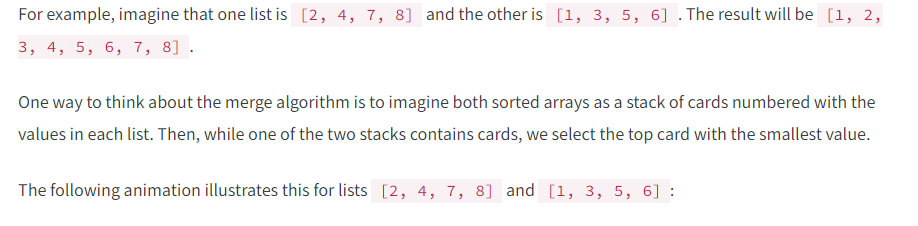

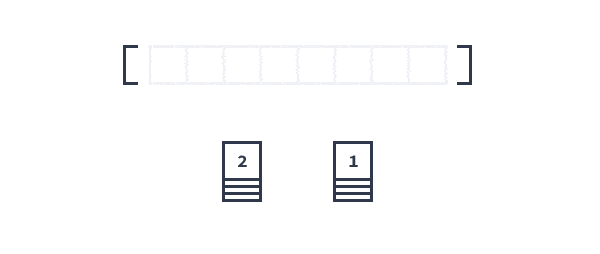

In [12]:
Image("7.2-m228.gif")

Since the lists are sorted, picking the values in this order ensures that the result is sorted.

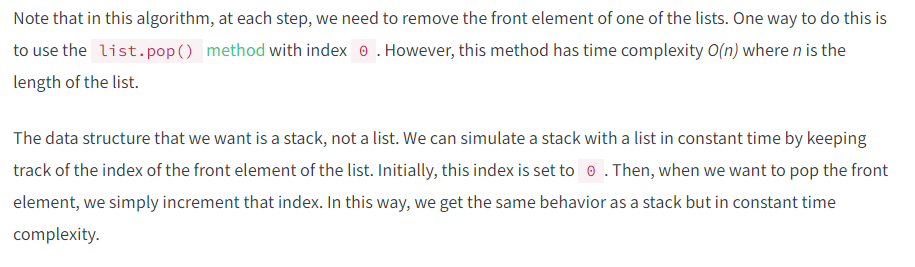

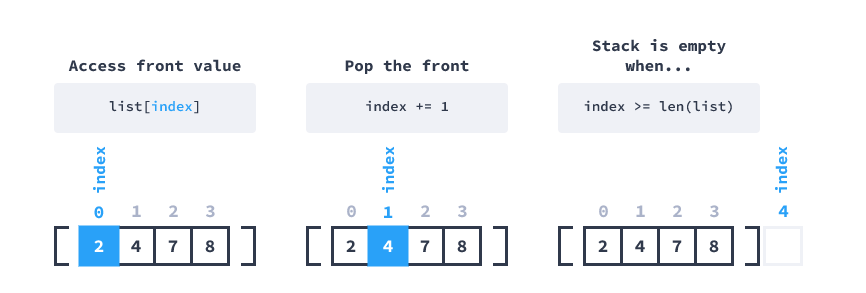

**Task**

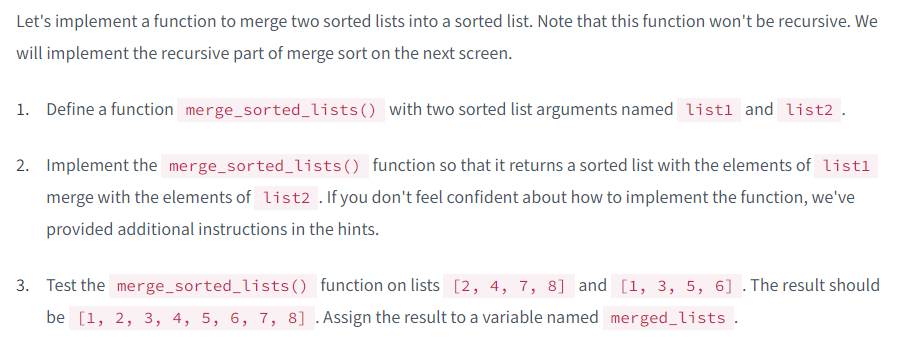

**Answer**

In [13]:
"""
Our implementation doesn't use the list.pop() method because
this method is O(n), not O(1). Instead we keep track of the 
index of the front element of each list to simulate removing
elements.
"""
def merge_sorted_lists(list1, list2):
    index1 = 0
    index2 = 0
    merged_list = []
    # Collect the font value while both lists are not empty
    while index1 < len(list1) and index2 < len(list2):
        if list1[index1] < list2[index2]:
            merged_list.append(list1[index1])
            index1 += 1
        else:
            merged_list.append(list2[index2])
            index2 += 1
    # Add remaining values
    merged_list += list1[index1:]
    merged_list += list2[index2:]
    return merged_list
    
            
merged_lists = merge_sorted_lists([1, 2, 3, 4], [5, 6, 7, 8])
print(merged_lists)

[1, 2, 3, 4, 5, 6, 7, 8]


Above we developed a *O(n)* algorithm to merge two sorted lists into a sorted list, where *n* is the total number of elements in both lists.

Now we'll complete the merge sort implementation. As we mentioned above, the idea is to split the list in half, sort both recursively and then use the `merge_sorted_lists()` function to merge the two sorted lists.

Here's the animation from the above that illustrates how merge sort works:

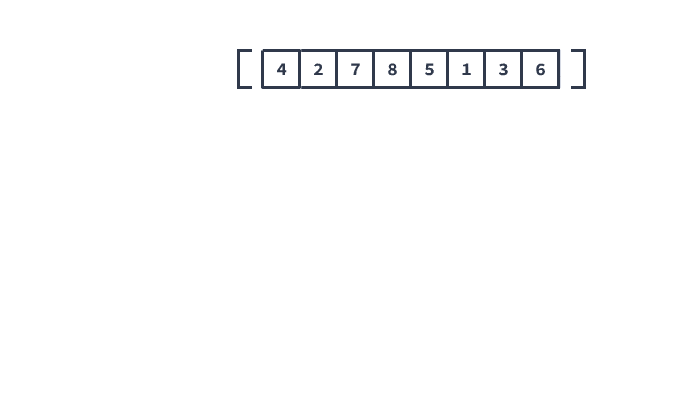

In [14]:
Image("7.1-m228.gif")

Note that we are again expressing the problem in terms of smaller subproblems. Sorting a list amounts to sorting its first half, then sorting its right half, and finally merging both results using the `merge_sorted_lists()` function.

To sort each half, we use the same reasoning. We split each half, sort each part, and merge the results. We continue like this until we reach the base case. What do we think the base case should be?

For merge sort, the base case is when either the list becomes empty or it contains a single element. In both of these cases, the list is sorted.

To split a list, we compute the middle index and then use list slicing to calculate each half:

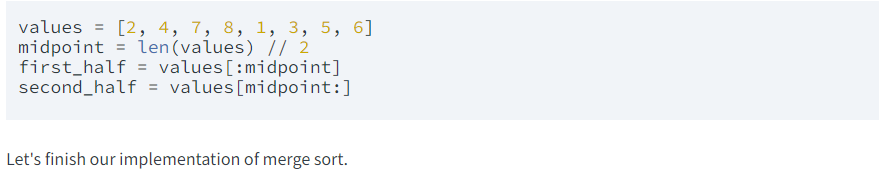

**Task**

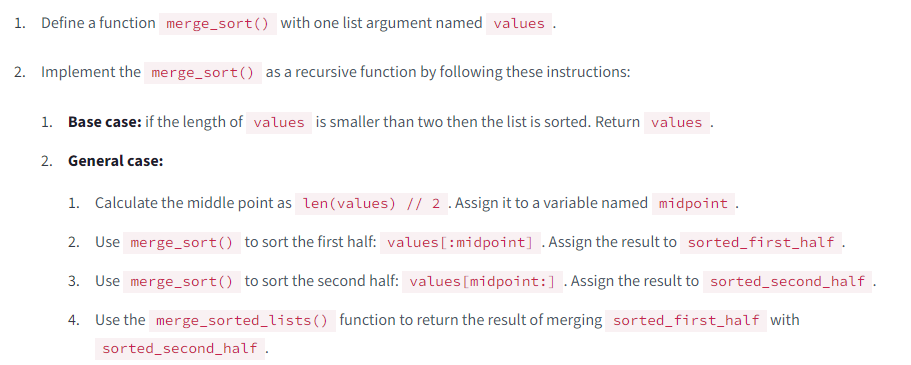

**Answer**

In [15]:
"""
import random
with open("./tests/merge_sort.in", "w") as f_in, open("./tests/merge_sort.out", "w") as f_out:
    for size in range(25):
        values = [random.randint(1, 100) for _ in range(size)]
        f_in.write("[{}]\n".format(values))
        f_out.write("{}\n".format(sorted(values)))
"""

def merge_sort(values):
    # Base case
    if len(values) < 2:
        return values
    # General case
    midpoint = len(values) // 2
    sorted_first_half = merge_sort(values[:midpoint])
    sorted_second_half = merge_sort(values[midpoint:])
    return merge_sorted_lists(sorted_first_half, sorted_second_half)

sorted_values = merge_sort([2, 4, 7, 8, 1, 3, 5, 6])
print(sorted_values)

[1, 2, 3, 4, 5, 6, 7, 8]


How fast is the merge sort algorithm? Analyzing the time complexity of a recursive algorithm is often more tricky than iterative algorithms.

The mathematical way of doing it is to use the [Master Theorem](https://en.wikipedia.org/wiki/Master_theorem_(analysis_of_algorithms)). However, understanding it is beyond the scope. The advantage of the master theorem is that it provides a general formula for the complexity of most recursive algorithms.

Without using the master theorem, we need an analysis that is specific to the algorithm. This is what we will do now. Let *n* denote the number of elements in the list.

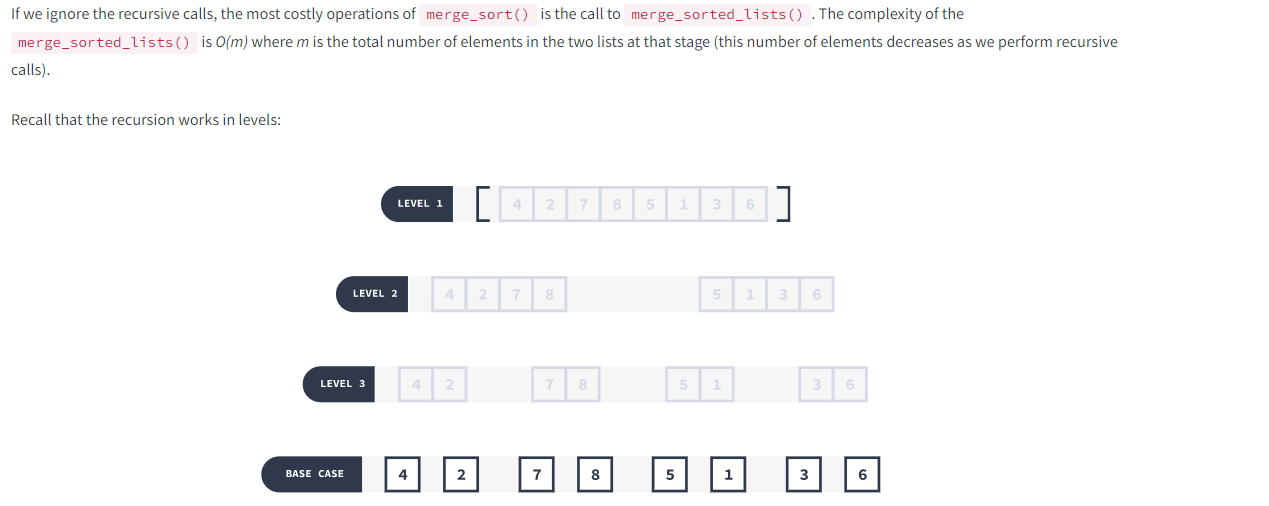

On the first level, we process one list with size *n*. On the second level, we process two lists of size *n / 2*. On the third level, we process four lists of size *n / 4*. This continues in the same way. Each time we go down one level, we double the number of lists and cut the size of each list in half.

The total complexity of `merge_sort()` is equal to the complexity of processing each of those lists. Let's do a level-by-level analysis.

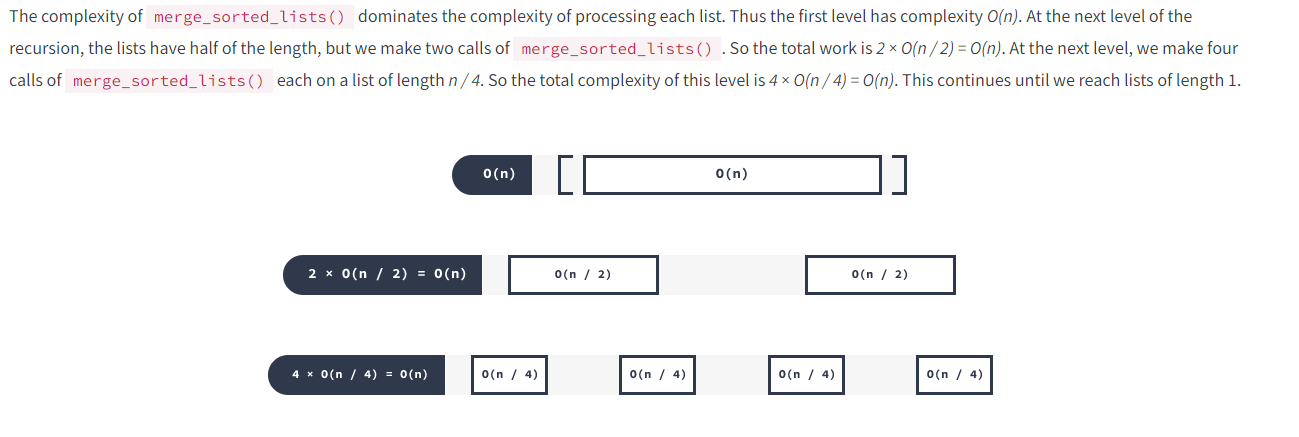

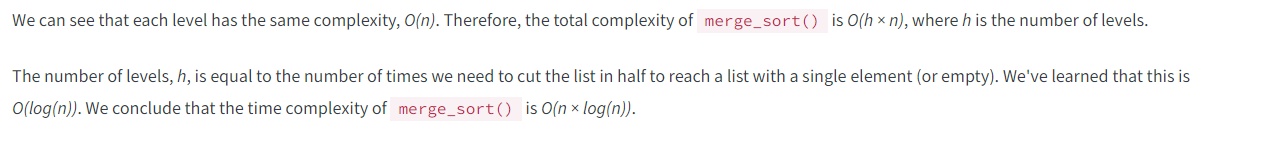

In this file, we have learned about recursion and a new implementation of a sorting algorithm (merge sort), and its analysis. Recall from the introduction that we said we were going to learn how to apply recursion to implement a new data structure.

In the next file, we will learn about binary trees, which will be the first of many tree structures we will work with.